# Multiple Linear Regression

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# pip install scikit-learn in cmd
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
# Data loading & inspecction
house = pd.read_csv(r"C:\Users\akars\OneDrive\Desktop\5th SEM\DATA VISUALIZATION, ANALYTICS\LAB\DataSet\Boston.csv")

In [4]:
# Printing first 5 data
house.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
# Printing additional info of columns
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
# Accessing specific coloumn 
house["MEDV"]

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [7]:
# Storing that column in a variable
y = house["MEDV"]

In [8]:
# Creating a new dataframe
x = house.drop(["MEDV"],axis=1)

In [9]:
# Splitting the dataset into training & testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state = 47)

In [10]:
# Dimensions check of training % testing dataset
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [11]:
# Creating linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [12]:
# training the linear regression model
model.fit(x_train, y_train)

LinearRegression()

In [13]:
# Bais term
model.intercept_

28.7906603378433

In [14]:
# Coefficient
model.coef_

array([-1.15968373e-01,  3.91763972e-02,  9.92241514e-03,  3.69277779e+00,
       -1.62691788e+01,  4.78053783e+00, -1.19792977e-02, -1.44207710e+00,
        2.72172220e-01, -1.18274581e-02, -9.41453989e-01,  9.62039782e-03,
       -4.16393266e-01])

In [15]:
# Making predictions on the dataset 
y_pred = model.predict(x_test)

In [16]:
y_pred

array([15.81514678, 32.37926288, 24.54278296, 30.88413252, 27.26011146,
       19.76212755, 23.31307468, 31.97370285, 32.65758864, 22.75069597,
       24.85887301, 27.23536024, 20.22285096, 28.08655284, 32.5882359 ,
       10.05223034, 36.15983992, 14.83486957, 11.83733767, 15.57322269,
       35.22027225, 22.2839578 , 38.82814794, 20.63852269, 28.51388028,
       19.04788806, 24.02567988, 20.81360377, 19.96505736, 26.44688259,
       14.1372452 , 25.79715435, 17.88787452,  8.25431166, 33.24604875,
       19.02215238, 12.44584599, 27.06613733, 22.74975077, 18.73764887,
       23.59779718, 25.26180231, 37.47827976, 21.21937484, 32.3495946 ,
       20.66902648,  7.57860895, 28.17219192, 36.57927934, 21.479344  ,
       28.94285403, 23.7785523 ,  7.38613363, 24.26071508,  6.35437587,
       21.93110088, 18.32956854, 13.5009917 ,  6.23384088, 30.11250948,
       12.44448301, 18.1954519 , 18.4025497 , 19.18851855, 42.32084082,
       22.51430919, 20.4121436 , 23.8282114 , 25.44033918, 27.73

In [17]:
# Calculating the mean absolute error
mean_absolute_error(y_test, y_pred)

3.2157913543296113

In [18]:
# Calculation of error in percentage
mean_absolute_percentage_error(y_test, y_pred)

0.15159979142916444

In [19]:
# Calculating mean squared error
mean_squared_error(y_test, y_pred)

26.618650352106137

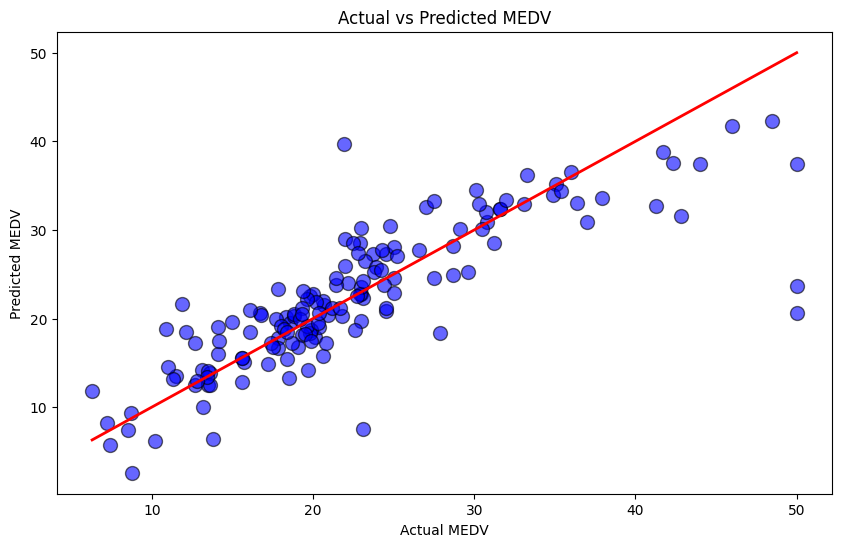

In [20]:
# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6, s=100)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted MEDV')
plt.show()

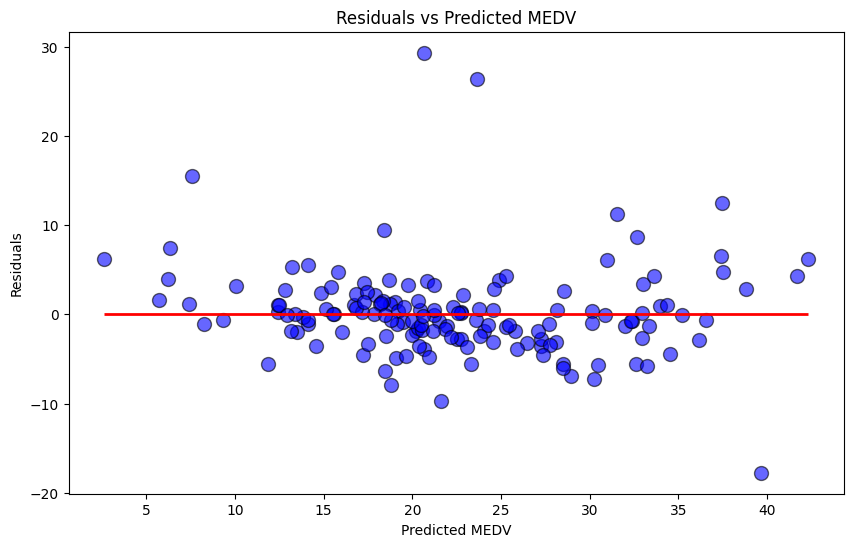

In [21]:
# Plotting the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', edgecolor='k', alpha=0.6, s=100)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), color='red', linewidth=2)
plt.xlabel('Predicted MEDV')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted MEDV')
plt.show()